In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
data_dynamic = pd.read_csv('../data/logs_slow_3g_dynamic.txt', sep=',')
data_dynamic

,bitrate (kbps),buffer level (secs),throughput (Mbps),segment download time (ms),segment size (bytes)
0,542,0.631,3.307912,1,542403
1,542,180.820,3.307912,1,542403
2,542,180.921,0.000365,13289,606474
3,542,172.936,0.000365,13289,606474
4,542,164.928,0.000365,13289,606474
...,...,...,...,...,...
105,542,0.114,0.001295,5789,1087153
106,542,8.482,0.000843,1530,78982
107,542,8.455,0.000933,2610,132200
108,542,8.466,0.000406,4230,213880


In [132]:
data_dynamic.tail()

,bitrate (kbps),buffer level (secs),throughput (Mbps),segment download time (ms),segment size (bytes)
105,542,0.114,0.001295,5789,1087153
106,542,8.482,0.000843,1530,78982
107,542,8.455,0.000933,2610,132200
108,542,8.466,0.000406,4230,213880
109,542,3.038,0.000409,1621,83374


In [133]:
data_dynamic['time (secs)'] =  range(8, 8 * len(data_dynamic) + 1, 8)
data_dynamic['segment download time (ms)'] =  data_dynamic['segment download time (ms)'] / 1000
data_dynamic.rename(columns={'segment download time (ms)': 'segment download time (s)'}, inplace=True)
data_dynamic

,bitrate (kbps),buffer level (secs),throughput (Mbps),segment download time (s),segment size (bytes),time (secs)
0,542,0.631,3.307912,0.001,542403,8
1,542,180.820,3.307912,0.001,542403,16
2,542,180.921,0.000365,13.289,606474,24
3,542,172.936,0.000365,13.289,606474,32
4,542,164.928,0.000365,13.289,606474,40
...,...,...,...,...,...,...
105,542,0.114,0.001295,5.789,1087153,848
106,542,8.482,0.000843,1.530,78982,856
107,542,8.455,0.000933,2.610,132200,864
108,542,8.466,0.000406,4.230,213880,872


In [134]:
data_bola = pd.read_csv('../data/logs_slow_3g_bola.txt', sep=',')
data_bola = data_bola.dropna()
data_bola['time (secs)'] =  range(8, 8 * len(data_bola) + 1, 8)
data_bola['segment download time (ms)'] =  data_bola['segment download time (ms)'] / 1000
data_bola.rename(columns={'segment download time (ms)': 'segment download time (s)'}, inplace=True)
data_bola['throughput (Mbps)'] = pd.to_numeric(data_bola['throughput (Mbps)']).apply(lambda x: format(x, '.1e'))
data_bola

,bitrate (kbps),buffer level (secs),throughput (Mbps),segment download time (s),segment size (bytes),time (secs)
1,542,7.275,3.6e-04,0.000,363191.0,8
2,542,66.136,5.3e-04,5.371,476864.0,16
3,542,58.176,5.3e-04,5.371,476864.0,24
4,542,58.210,4.9e-04,15.271,764850.0,32
5,542,50.235,4.9e-04,15.271,764850.0,40
...,...,...,...,...,...,...
113,542,0.115,1.3e-03,5.788,1087153.0,904
114,542,11.098,8.4e-04,1.531,78982.0,912
115,542,11.070,9.3e-04,2.611,132200.0,920
116,542,11.098,4.1e-04,4.230,213880.0,928


In [135]:
data_throughput = pd.read_csv('../data/logs_slow_3g_throughput.txt', sep=',')
data_throughput['time (secs)'] =  range(8, 8 * len(data_throughput) + 1, 8)
data_throughput['segment download time (ms)'] =  data_throughput['segment download time (ms)'] / 1000
data_throughput.rename(columns={'segment download time (ms)': 'segment download time (s)'}, inplace=True)
data_throughput['segment download time (s)'] = pd.to_numeric(data_throughput['segment download time (s)']).apply(lambda x: format(x, '.1e'))
data_throughput

,bitrate (kbps),buffer level (secs),throughput (Mbps),segment download time (s),segment size (bytes),time (secs)
0,1628,64.356,6.755782,2.0e-03,1116470,8
1,1628,64.298,6.436653,2.0e-03,1409680,16
2,1628,64.337,6.759498,2.0e-03,2174142,24
3,1628,64.357,6.247868,1.0e-03,916222,32
4,1628,64.478,5.705767,1.0e-03,374408,40
...,...,...,...,...,...,...
74,1628,34.726,6.347470,1.0e-03,235679,600
75,1628,26.755,6.347470,1.0e-03,235679,608
76,1628,18.761,6.347470,1.0e-03,235679,616
77,1628,10.797,6.347470,1.0e-03,235679,624


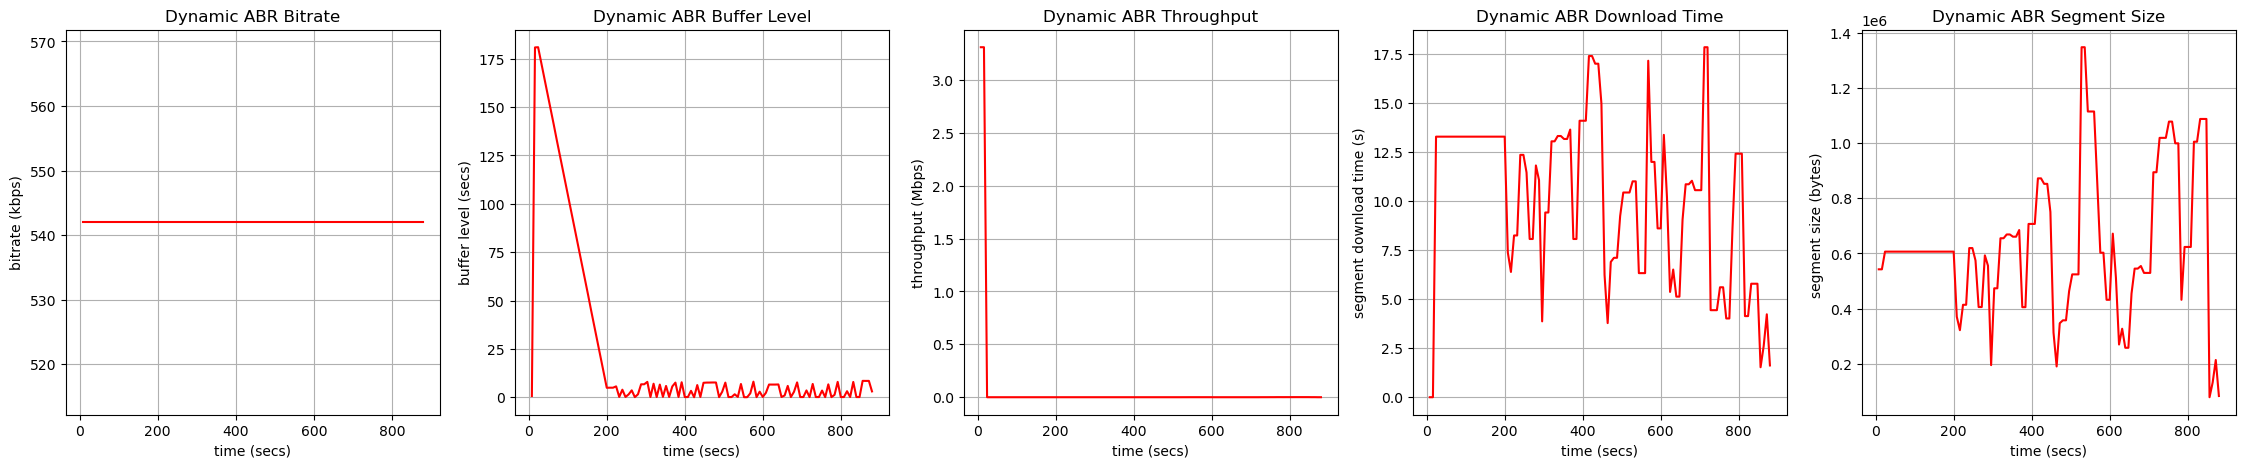

In [136]:
# Define a list of titles for each row
titles = ["Dynamic ABR", "Bola ABR", "Throughput ABR"]
columns = ["Bitrate", "Buffer Level", "Throughput", "Download Time", "Segment Size"]
colors = ["red", "green", "blue"]
x = "time (secs)"

# Create a figure with 5 subplots (one for each column)
fig, axs = plt.subplots(1, 5, figsize=(28, 5))

# Create a line plot for each column, with time on the x-axis
for i, column in enumerate(data_dynamic.columns):
    if column != x:
        sns.lineplot(data=data_dynamic, x=x, y=column, ax=axs[i], color=colors[0]).set(title=titles[0] + " " + columns[i])
        axs[i].grid()

# # Create line plots for each DataFrame
# for i, df in enumerate([data_dynamic, data_bola, data_throughput]):
#     # Create line plots for each column in the DataFrame
#     for j, column in enumerate(df.columns):
#         if column != x:
#             sns.lineplot(data=df, x=x, y=column, ax=axs[i][j])
#         if j == 0:
#                 axs[i][j].set_title(titles[i])

plt.show()

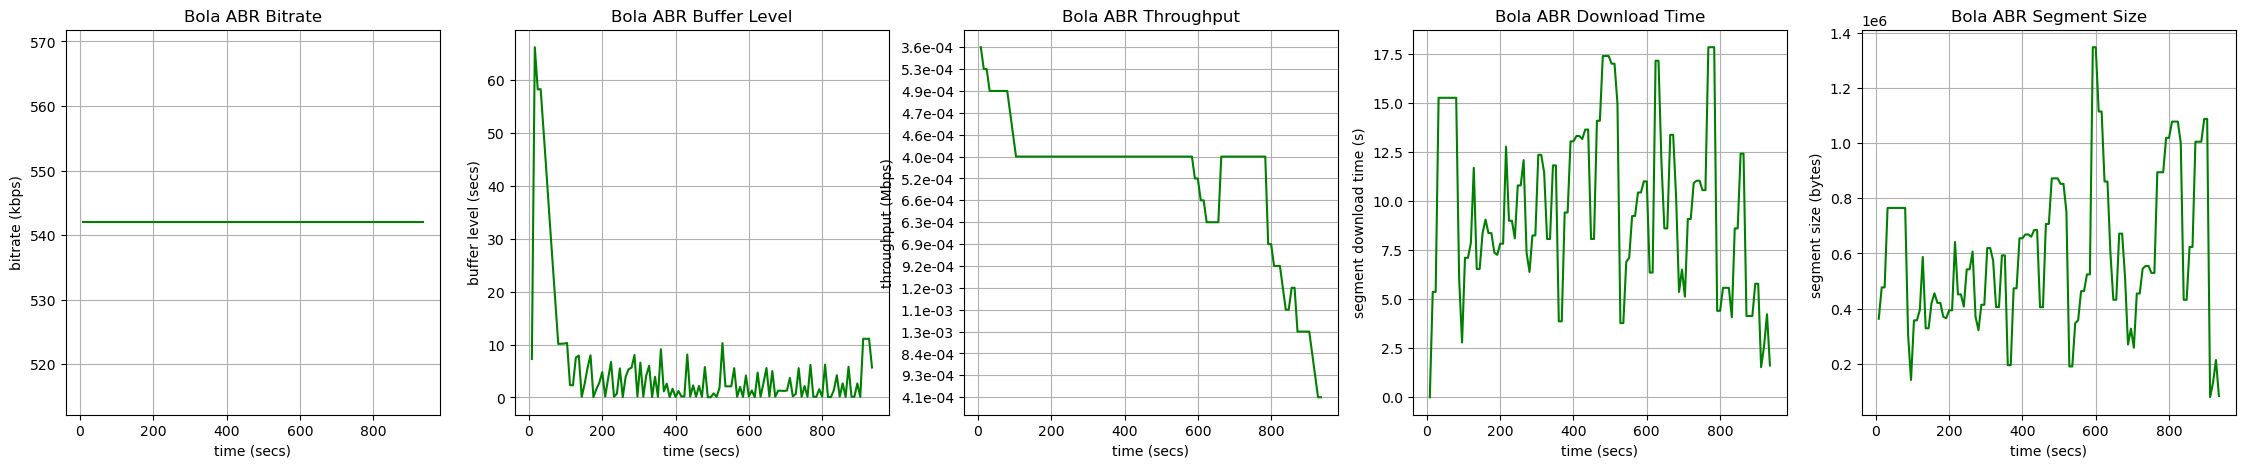

In [137]:
# Create a figure with 5 subplots (one for each column)
fig, axs = plt.subplots(1, 5, figsize=(28, 5))

# Create a line plot for each column, with time on the x-axis
for i, column in enumerate(data_bola.columns):
    if column != x:
        sns.lineplot(data=data_bola, x=x, y=column, ax=axs[i], color=colors[1]).set(title=titles[1] + " " + columns[i])
        axs[i].grid()

plt.show()

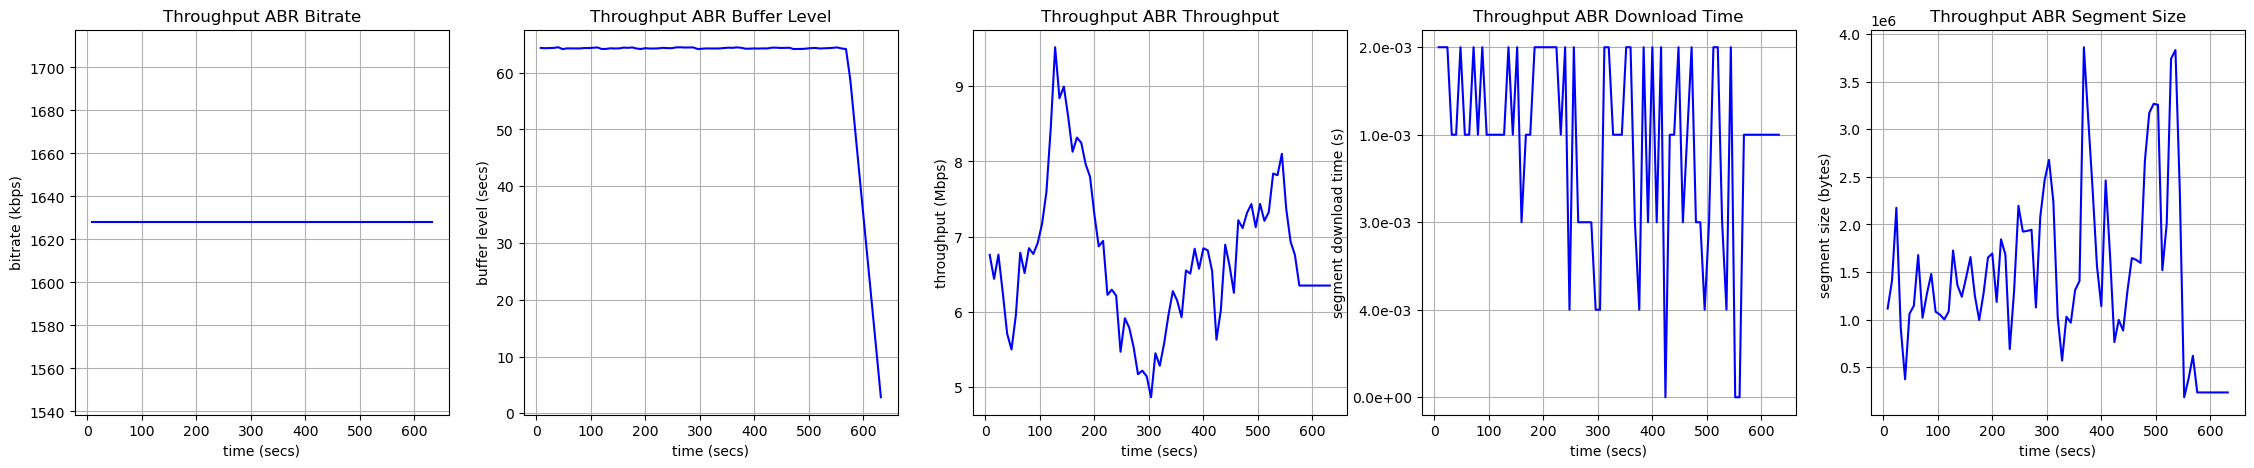

In [138]:
# Create a figure with 5 subplots (one for each column)
fig, axs = plt.subplots(1, 5, figsize=(28, 5))

# Create a line plot for each column, with time on the x-axis
for i, column in enumerate(data_throughput.columns):
    if column != x:
        sns.lineplot(data=data_throughput, x=x, y=column, ax=axs[i], color=colors[2]).set(title=titles[2] + " " + columns[i])
        axs[i].grid()

plt.show()

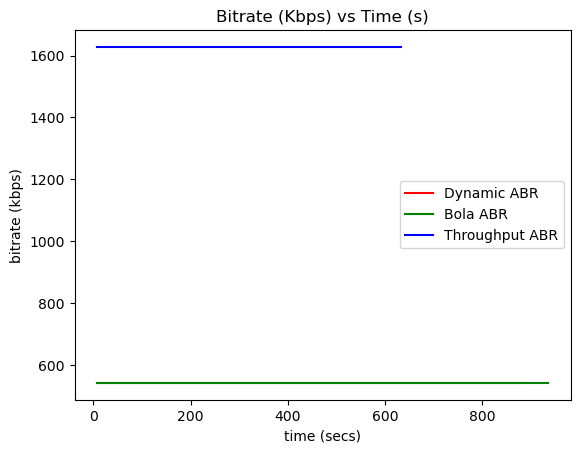

In [139]:
columns = ['bitrate (kbps)', 'buffer level (secs)', 'throughput (Mbps)', 'segment download time (s)', 'segment size (bytes) ', 'time (secs)']
titles = ["Dynamic ABR", "Bola ABR", "Throughput ABR"]

# Change this depending on the columns you want to plot
i = 0
sns.lineplot(data=data_dynamic, x=x, y=columns[i], color=colors[0], label=titles[0])
sns.lineplot(data=data_bola, x=x, y=columns[i], color=colors[1], label=titles[1])
sns.lineplot(data=data_throughput, x=x, y=columns[i], color=colors[2], label=titles[2])
plt.title("Bitrate (Kbps) vs Time (s)")
plt.legend()
plt.show()

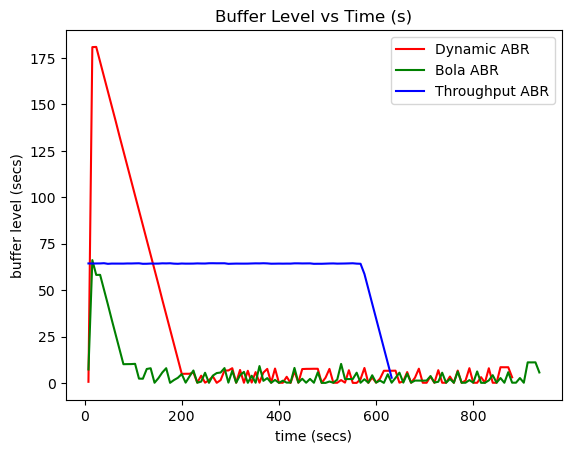

In [140]:
# Change this depending on the columns you want to plot
i = 1
sns.lineplot(data=data_dynamic, x=x, y=columns[i], color=colors[0], label=titles[0])
sns.lineplot(data=data_bola, x=x, y=columns[i], color=colors[1], label=titles[1])
sns.lineplot(data=data_throughput, x=x, y=columns[i], color=colors[2], label=titles[2])
plt.title("Buffer Level vs Time (s)")
plt.legend()
plt.show()

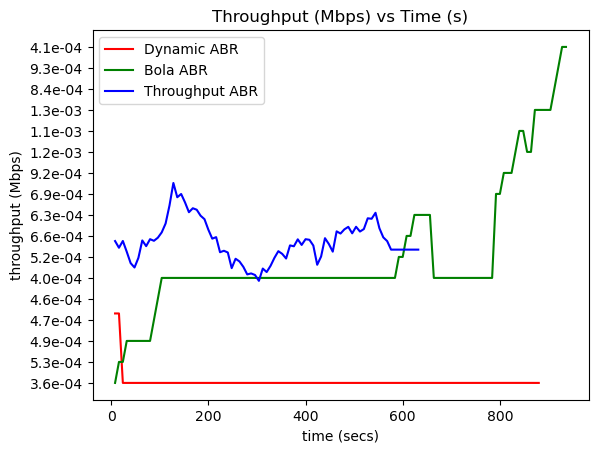

In [141]:
columns = ['bitrate (kbps)', 'buffer level (secs)', 'throughput (Mbps)', 'segment download time (s)', 'segment size (bytes) ', 'time (secs)']
titles = ["Dynamic ABR", "Bola ABR", "Throughput ABR"]
# Change this depending on the columns you want to plot
i = 2

# # Create a figure and axis object
# fig, ax = plt.subplots()

# # Plot first dataframe
# ax.plot(data_dynamic[x], data_dynamic[columns[i]], color=colors[0], label=titles[0])
# # Overlay second dataframe
# ax.plot(data_bola[x], data_bola[columns[i]], color=colors[1], label=titles[1])
# ax.plot(data_throughput[x], data_throughput[columns[i]], color=colors[2], label=titles[2])

sns.lineplot(data=data_dynamic, x=x, y=columns[i], color=colors[0], label=titles[0])
sns.lineplot(data=data_bola, x=x, y=columns[i], color=colors[1], label=titles[1])
sns.lineplot(data=data_throughput, x=x, y=columns[i], color=colors[2], label=titles[2])
plt.title("Throughput (Mbps) vs Time (s)")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

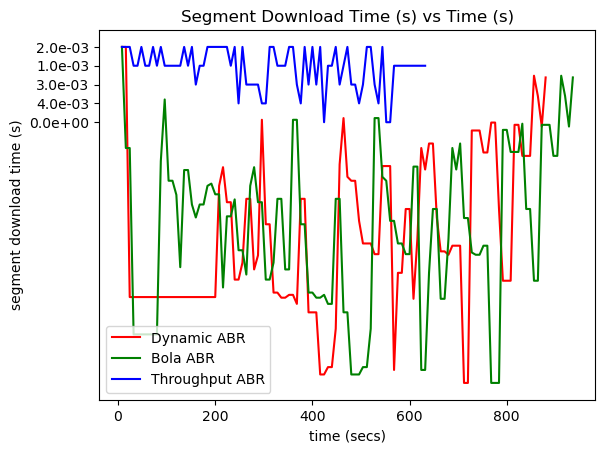

In [142]:
# Change this depending on the columns you want to plot
i = 3
sns.lineplot(data=data_dynamic, x=x, y=columns[i], color=colors[0], label=titles[0])
sns.lineplot(data=data_bola, x=x, y=columns[i], color=colors[1], label=titles[1])
sns.lineplot(data=data_throughput, x=x, y=columns[i], color=colors[2], label=titles[2])
plt.title("Segment Download Time (s) vs Time (s)")
plt.legend()
plt.show()

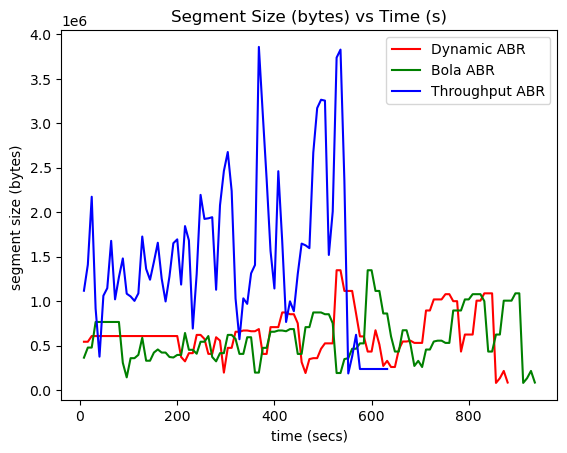

In [143]:
# Change this depending on the columns you want to plot
i = 4
sns.lineplot(data=data_dynamic, x=x, y=columns[i], color=colors[0], label=titles[0])
sns.lineplot(data=data_bola, x=x, y=columns[i], color=colors[1], label=titles[1])
sns.lineplot(data=data_throughput, x=x, y=columns[i], color=colors[2], label=titles[2])
plt.title("Segment Size (bytes) vs Time (s)")
plt.legend()
plt.show()